In [1]:
#Configuro el Google Colab conectandome a los datos desde la cuenta de Google
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#data set
data_path = '/content/gdrive/MyDrive/Colab Notebooks/Proyecto_integradorA/all_files_E.csv'

df_data = pd.read_csv(data_path,  sep=',',  comment='#')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17354 entries, 0 to 17353
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         17354 non-null  int64  
 1   serial             17354 non-null  object 
 2   mfr                17354 non-null  object 
 3   fecha              17354 non-null  object 
 4   requested_test_kv  17354 non-null  float64
 5   test_kv            17125 non-null  float64
 6   ma                 16073 non-null  float64
 7   watts              16073 non-null  float64
 8   measured_cap       16071 non-null  float64
 9   pfm                15991 non-null  float64
 10  pfm_tipup          9045 non-null   float64
 11  line_id            11521 non-null  float64
 12  group_number       17354 non-null  int64  
 13  circuit            17354 non-null  object 
 14  location           17354 non-null  object 
 15  division           17193 non-null  object 
 16  company            173

In [ ]:
df_data

,Unnamed: 0,serial,mfr,fecha,requested_test_kv,test_kv,ma,watts,measured_cap,pfm,pfm_tipup,line_id,group_number,circuit,location,division,company,cct_designation,stator_kv
0,0,715015,Toshiba,2018-11-27 16:07:37,2.0,1.994720,3572.892785,388.191193,948070.805862,1.086490,NaN,1.0,0,CIRC_GND_RB,PORCE III,GUADALUPE PORCE,EMPRESAS PUBLICAS DE MEDELLIN EPM,UNIDAD 3,13.8
1,1,715015,Toshiba,2018-11-27 16:07:37,4.0,4.015733,3583.967686,458.960388,950296.254132,1.280593,0.194103,2.0,0,CIRC_GND_RB,PORCE III,GUADALUPE PORCE,EMPRESAS PUBLICAS DE MEDELLIN EPM,UNIDAD 3,13.8
2,2,715015,Toshiba,2018-11-27 16:07:37,6.0,5.990353,3568.703294,517.651520,947210.963886,1.450531,0.364041,3.0,0,CIRC_GND_RB,PORCE III,GUADALUPE PORCE,EMPRESAS PUBLICAS DE MEDELLIN EPM,UNIDAD 3,13.8
3,3,715015,Toshiba,2018-11-27 16:07:37,8.0,8.009873,3599.445462,585.986572,954618.258220,1.627991,0.541501,4.0,0,CIRC_GND_RB,PORCE III,GUADALUPE PORCE,EMPRESAS PUBLICAS DE MEDELLIN EPM,UNIDAD 3,13.8
4,4,715015,Toshiba,2018-11-27 16:07:37,2.0,2.000625,3562.023163,385.123230,945508.958239,1.081192,NaN,5.0,1,CIRC_GND_RB,PORCE III,GUADALUPE PORCE,EMPRESAS PUBLICAS DE MEDELLIN EPM,UNIDAD 3,13.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17349,17349,82EU7701,Alstom,2005-10-01 17:29:11,8.0,8.010000,12.515000,2.505000,3318.600000,2.000000,NaN,36.0,4,Undefined,GUADALUPE IV,GUADALUPE,EEPPM,UNIDAD 1,13.8
17350,17350,82EU7701,Alstom,2005-10-01 17:29:11,2.0,2.001000,11.261000,2.216000,2988.400000,1.970000,NaN,41.0,5,Undefined,GUADALUPE IV,GUADALUPE,EEPPM,UNIDAD 1,13.8
17351,17351,82EU7701,Alstom,2005-10-01 17:29:11,4.0,4.001000,11.285000,2.141000,2994.200000,1.900000,NaN,42.0,5,Undefined,GUADALUPE IV,GUADALUPE,EEPPM,UNIDAD 1,13.8
17352,17352,82EU7701,Alstom,2005-10-01 17:29:11,6.0,5.998000,11.294000,2.207000,2996.400000,1.950000,NaN,43.0,5,Undefined,GUADALUPE IV,GUADALUPE,EEPPM,UNIDAD 1,13.8


In [ ]:
#Seleccionar columnas de interés para primera parte del proceso
columnas_obj = ['fecha' ,'serial', 'mfr', 'requested_test_kv', 'test_kv', 'ma', 'watts',
                'measured_cap', 'pfm', 'group_number','stator_kv']


df = df_data[columnas_obj].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17354 entries, 0 to 17353
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              17354 non-null  object 
 1   serial             17354 non-null  object 
 2   mfr                17354 non-null  object 
 3   requested_test_kv  17354 non-null  float64
 4   test_kv            17125 non-null  float64
 5   ma                 16073 non-null  float64
 6   watts              16073 non-null  float64
 7   measured_cap       16071 non-null  float64
 8   pfm                15991 non-null  float64
 9   group_number       17354 non-null  int64  
 10  stator_kv          17354 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Reemplazar los valores en la columna group_number
df['group_number'] = df['group_number'].replace({0: 'GST', 1: 'GST', 2: 'GST', 6:'GST', 3: 'UST', 4: 'UST', 5: 'UST'})
df[df['group_number'] == 6]

,fecha,serial,mfr,requested_test_kv,test_kv,ma,watts,measured_cap,pfm,group_number,stator_kv


In [ ]:
# Estandarizacion de columna mfr empleando diccionario
# Diccionario de mapeo de valores originales a valores deseados
mapeo = {
  'Ansal' : 'ANS',
  'General Electric' : 'GE',
  'Brown Boveri Company' : 'GMX',
  'Mitsubishi' : 'MIT',
  'ENERGOMEX' : 'ENG',
  'Rade-Koncar' : 'RK',
  'Toshiba' : 'TOS',
  'AEG Power Tool Corp.' : 'GMX',
  'Alstom' : 'ALS',
  'ASEA' : 'GMX',
  'RADE KONCAR' : 'RK',
  'Westinghouse Electric' : 'OTH',
  'TIBB' : 'GMX',
  'ABB (ASEA-Brown Boveri)' : 'GMX',
  'Koch & Sterzel' : 'OTH',
  'Hitachi' : 'HIT',
  'ASEA Inc.' : 'GMX',
  'Cenemesa' : 'OTH',
  'HITACHI' : 'HIT',
  'Raychem' : 'OTH',
  'Brush Ltd. (H-S Group)' : 'OTH',
  'HARBIN ELECTRIC MACHINERY' : 'OTH',
  'Magnetek' : 'OTH',
  'GAMESA' : 'OTH'
}

# Cambiar los valores en la columna 'mfr' utilizando el diccionario
df['mfr'] = df['mfr'].map(mapeo)
df

,fecha,serial,mfr,requested_test_kv,test_kv,ma,watts,measured_cap,pfm,group_number,stator_kv
0,2018-11-27 16:07:37,715015,TOS,2.0,1.994720,3572.892785,388.191193,948070.805862,1.086490,GST,13.8
1,2018-11-27 16:07:37,715015,TOS,4.0,4.015733,3583.967686,458.960388,950296.254132,1.280593,GST,13.8
2,2018-11-27 16:07:37,715015,TOS,6.0,5.990353,3568.703294,517.651520,947210.963886,1.450531,GST,13.8
3,2018-11-27 16:07:37,715015,TOS,8.0,8.009873,3599.445462,585.986572,954618.258220,1.627991,GST,13.8
4,2018-11-27 16:07:37,715015,TOS,2.0,2.000625,3562.023163,385.123230,945508.958239,1.081192,GST,13.8
...,...,...,...,...,...,...,...,...,...,...,...
17349,2005-10-01 17:29:11,82EU7701,ALS,8.0,8.010000,12.515000,2.505000,3318.600000,2.000000,UST,13.8
17350,2005-10-01 17:29:11,82EU7701,ALS,2.0,2.001000,11.261000,2.216000,2988.400000,1.970000,UST,13.8
17351,2005-10-01 17:29:11,82EU7701,ALS,4.0,4.001000,11.285000,2.141000,2994.200000,1.900000,UST,13.8
17352,2005-10-01 17:29:11,82EU7701,ALS,6.0,5.998000,11.294000,2.207000,2996.400000,1.950000,UST,13.8


/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


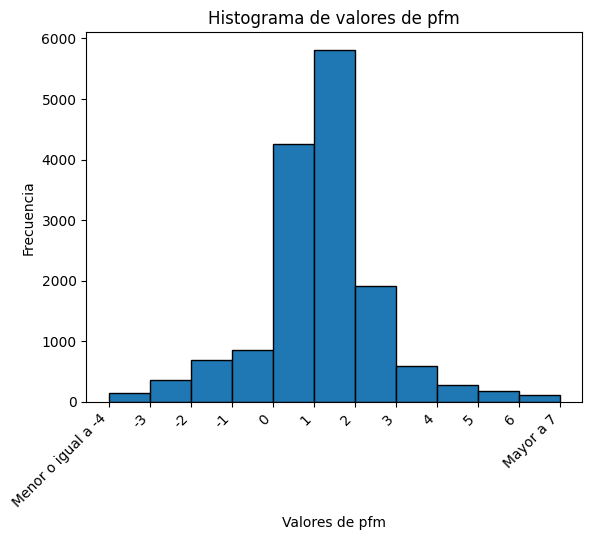

In [ ]:
# Definir los límites de los intervalos
bins = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, float('inf')]

# Crear el histograma
plt.hist(df['pfm'], bins=bins, edgecolor='black')

# Etiquetas y título del gráfico
plt.xlabel('Valores de pfm')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores de pfm')

# Agregar leyenda a los intervalos
intervalos = ['Menor o igual a -4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5', '6', 'Mayor a 7']
plt.xticks(bins[:-1], intervalos, rotation=45, ha='right')  # Ajusta la rotación y la alineación de las etiquetas

# Mostrar el histograma
plt.show()

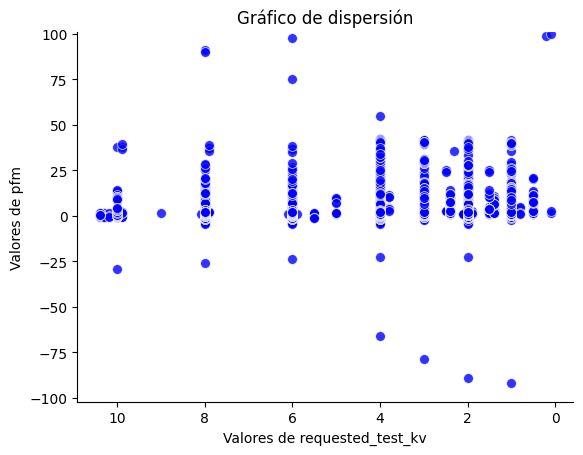

In [ ]:
# Gráfico de dispersión de datos en df
sns.scatterplot(data=df, x='requested_test_kv', y='pfm', s=50, alpha=.8, color='blue')

# Oculta los ejes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Invierte el eje x
plt.gca().invert_xaxis()

# Ajusta los límites del eje y para mostrar más detalle
plt.ylim(bottom=df['pfm'].min() - 10, top=df['pfm'].max() + 1)

# Etiquetas y título del gráfico
plt.xlabel('Valores de requested_test_kv')
plt.ylabel('Valores de pfm')
plt.title('Gráfico de dispersión')

# Mostrar el gráfico
plt.show()

Arbitrariamente se determina establecer como outliers "temporales los valores por fuera del intervalo -4<pfm<10. Luego se tendrán en cuenta para los datos de entrenamiento del modelo, y estos partirán con una calificacion predeterminada 'qual'="F": Falla

In [ ]:
# Definir el intervalo de outliers; estos registros serán excluidos de df
intervalo_inferior = -4
intervalo_superior = 10

# Filtrar el DataFrame para obtener los outliers
outliers = df[(df['pfm'] < intervalo_inferior) | (df['pfm'] > intervalo_superior)].copy()

# Asignar la calificación "F" a la columna 'qual' para estos valores outliers
outliers.loc[:, 'qual'] = "F"

outliers

,fecha,serial,mfr,requested_test_kv,test_kv,ma,watts,measured_cap,pfm,group_number,stator_kv,qual
547,2019-05-25 17:37:05,1S15P15,GE,1.0,0.999113,11.847220,22.429742,3088.538980,18.932493,UST,6.9,F
548,2019-05-25 17:37:05,1S15P15,GE,2.0,2.000957,11.973503,23.183011,3116.137903,19.361929,UST,6.9,F
549,2019-05-25 17:37:05,1S15P15,GE,3.0,3.001975,12.074430,23.709095,3139.685290,19.635789,UST,6.9,F
550,2019-05-25 17:37:05,1S15P15,GE,4.0,4.002550,12.169372,24.328071,3161.062301,19.991229,UST,6.9,F
551,2019-05-25 17:37:05,1S15P15,GE,1.0,0.999528,11.751397,21.676140,3065.161125,18.445585,UST,6.9,F
...,...,...,...,...,...,...,...,...,...,...,...,...
17249,2009-09-24 19:08:15,82EU7701,ALS,8.0,8.006000,13.510000,17.159000,3553.000000,12.700000,UST,13.8,F
17250,2009-09-24 19:08:15,82EU7701,ALS,2.0,1.999000,13.382000,16.197000,3522.800000,12.100000,UST,13.8,F
17251,2009-09-24 19:08:15,82EU7701,ALS,4.0,4.003000,13.419000,16.332000,3533.900000,12.170000,UST,13.8,F
17252,2009-09-24 19:08:15,82EU7701,ALS,6.0,6.003000,13.425000,16.581000,3536.200000,12.350000,UST,13.8,F


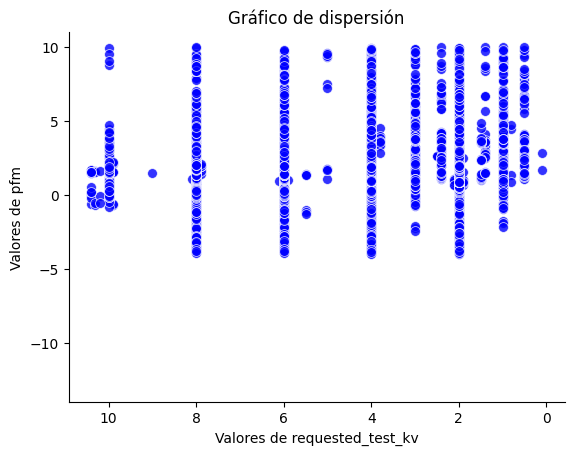

In [ ]:
# Eliminar los outliers del DataFrame original
df = df.drop(outliers.index)

# Crear el gráfico de dispersión ya sin outliers
sns.scatterplot(data=df, x='requested_test_kv', y='pfm', s=50, alpha=.8, color='blue')

# Oculta los ejes superior y derecho
plt.gca().spines[['top', 'right']].set_visible(False)

# Invierte el eje x
plt.gca().invert_xaxis()

# Ajusta los límites del eje y para mostrar más detalle
plt.ylim(bottom=df['pfm'].min() - 10, top=df['pfm'].max() + 1)

# Etiquetas y título del gráfico
plt.xlabel('Valores de requested_test_kv')
plt.ylabel('Valores de pfm')
plt.title('Gráfico de dispersión')

# Mostrar el gráfico de valores df con outliers eliminados
plt.show()

In [ ]:
#Eliminar filas con 'pfm'= 0 o NaN
columna_filtrar = 'pfm'
df = df[(df[columna_filtrar] != 0) & (~df[columna_filtrar].isna())]

# Contar la cantidad de ceros en la columna
cantidad_ceros = (df['pfm'] == 0).sum()

# Contar la cantidad de NaN en la columna
cantidad_nan = df['pfm'].isna().sum()

print(f"Cantidad de ceros en {'pfm'}: {cantidad_ceros}")
print(f"Cantidad de NaN en {'pfm'}: {cantidad_nan}")
df.info()

Cantidad de ceros en pfm: 0
Cantidad de NaN en pfm: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15436 entries, 0 to 17353
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              15436 non-null  object 
 1   serial             15436 non-null  object 
 2   mfr                15436 non-null  object 
 3   requested_test_kv  15436 non-null  float64
 4   test_kv            15436 non-null  float64
 5   ma                 15436 non-null  float64
 6   watts              15436 non-null  float64
 7   measured_cap       15434 non-null  float64
 8   pfm                15436 non-null  float64
 9   group_number       15436 non-null  object 
 10  stator_kv          15436 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [ ]:
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Proyecto_integradorA/clean_dataSets.csv')

In [ ]:
# Mostrando las primeras filas del dataset y un resumen de los datos

# Obteniendo una vista general de los datos
data_info = df.info()
data_head = df.head()
data_describe = df.describe()

data_info, data_head, data_describe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15436 entries, 0 to 17353
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fecha              15436 non-null  object 
 1   serial             15436 non-null  object 
 2   mfr                15436 non-null  object 
 3   requested_test_kv  15436 non-null  float64
 4   test_kv            15436 non-null  float64
 5   ma                 15436 non-null  float64
 6   watts              15436 non-null  float64
 7   measured_cap       15434 non-null  float64
 8   pfm                15436 non-null  float64
 9   group_number       15436 non-null  object 
 10  stator_kv          15436 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


(None,
                  fecha  serial  mfr  requested_test_kv   test_kv           ma  \
 0  2018-11-27 16:07:37  715015  TOS                2.0  1.994720  3572.892785   
 1  2018-11-27 16:07:37  715015  TOS                4.0  4.015733  3583.967686   
 2  2018-11-27 16:07:37  715015  TOS                6.0  5.990353  3568.703294   
 3  2018-11-27 16:07:37  715015  TOS                8.0  8.009873  3599.445462   
 4  2018-11-27 16:07:37  715015  TOS                2.0  2.000625  3562.023163   
 
         watts   measured_cap       pfm group_number  stator_kv  
 0  388.191193  948070.805862  1.086490          GST       13.8  
 1  458.960388  950296.254132  1.280593          GST       13.8  
 2  517.651520  947210.963886  1.450531          GST       13.8  
 3  585.986572  954618.258220  1.627991          GST       13.8  
 4  385.123230  945508.958239  1.081192          GST       13.8  ,
        requested_test_kv       test_kv            ma         watts  \
 count       15436.000000  1543

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
# Seleccionamos solo las columnas numéricas para el PCA
columnas_numericas = ['ma', 'watts', 'measured_cap', 'pfm']
data_numeric = df[columnas_numericas]

# Imputamos los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_numeric)

# Estandarizamos los datos (importante para PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Aplicamos PCA
pca = PCA(n_components=2)  # Ajusta el número de componentes según lo desees
pca_result = pca.fit_transform(data_scaled)

# Convertimos el resultado en un DataFrame para facilitar la visualización
pca_df = pd.DataFrame(data = pca_result, columns = ['PC1', 'PC2'])

# Mostramos los primeros registros del resultado
print(pca_df.head())

        PC1       PC2
0  4.554301 -1.030735
1  4.824315 -0.907644
2  5.021136 -0.793080
3  5.306827 -0.686716
4  4.530108 -1.030909


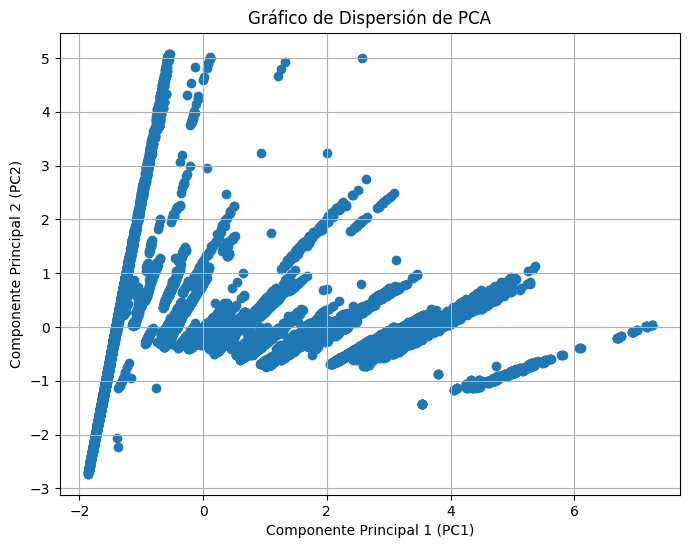

In [ ]:
# Gráfico de dispersión de los resultados de PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Gráfico de Dispersión de PCA')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu, wilcoxon

In [ ]:
# Seleccionamos dos grupos para comparar, por ejemplo, grupo 1 y grupo 2
grupo1 = df[df['group_number'] == 1]['pfm']  # Reemplaza 'pfm' por la columna que deseas comparar
grupo2 = df[df['group_number'] == 2]['pfm']  # Reemplaza 'pfm' por la columna que deseas comparar


# Realizamos las pruebas adecuadas según los datos
if len(grupo1) > 20 and len(grupo2) > 20 and len(grupo1) != len(grupo2):o
    # Prueba U de Mann-Whitney
    u_statistic, p_value_mw = mannwhitneyu(grupo1, grupo2)
    print(f"Resultado de la Prueba U de Mann-Whitney: Estadístico={u_statistic}, p-valor={p_value_mw}")
elif len(grupo1) == len(grupo2):
    # Prueba de Wilcoxon (para muestras relacionadas o con el mismo número de datos)
    w_statistic, p_value_w = wilcoxon(grupo1, grupo2)
    print(f"Resultado de la Prueba de Wilcoxon: Estadístico={w_statistic}, p-valor={p_value_w}")
else:
    print("No se pueden realizar las pruebas debido a diferencias en el tamaño de las muestras.")


Resultado de la Prueba de Wilcoxon: Estadístico=nan, p-valor=nan


Resultados de PCA
Los valores para PC1 y PC2 son las primeras dos componentes principales obtenidas del análisis de PCA.

Estos valores representan una transformación de tus datos originales a un nuevo espacio de características donde PC1 y PC2 son las direcciones de máxima varianza. En resumen:

PC1 y PC2 son combinaciones lineales de los variables originales.
PC1 es la dirección donde los datos tienen la mayor varianza.
PC2 es perpendicular a PC1 y representa la segunda mayor varianza.

Estos resultados pueden ser visualizados en un gráfico de dispersión para entender mejor cómo se distribuyen tus datos en este nuevo espacio de componentes principales.

Resultado de la Prueba U de Mann-Whitney
El estadístico de 3349989.0 y un p-valor de 0.44225516073166227 sugieren lo siguiente:

El estadístico en sí mismo no proporciona una interpretación directa sin considerar el tamaño de la muestra y la distribución de los datos.

El p-valor es mayor que 0.05 (umbral común para significancia estadística), lo que sugiere que no hay evidencia suficiente para rechazar la hipótesis nula.

En otras palabras, no hay diferencias significativas entre las distribuciones de los dos grupos comparados en la prueba U de Mann-Whitney, según la variable analizada.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor

In [ ]:
# Definimos la variable objetivo y las variables predictoras
y = df['pfm']  # Variable a predecir
X = df[['requested_test_kv', 'test_kv', 'ma', 'watts', 'measured_cap', 'stator_kv']]  # Variables predictoras
# Imputamos los valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo RANSAC
ransac = RANSACRegressor()
ransac.fit(X_train, y_train)

# Evaluamos el modelo
score = ransac.score(X_test, y_test)
print(f"Puntuación del modelo: {score}")

# Hacemos predicciones con el modelo
y_pred = ransac.predict(X_test)

Puntuación del modelo: -0.12278771730300142


In [ ]:
from sklearn.linear_model import HuberRegressor

# Creación del modelo HuberRegressor
huber = HuberRegressor()
huber.fit(X_train, y_train)

# Evaluación del modelo
huber_score = huber.score(X_test, y_test)
print(f"Puntuación del modelo HuberRegressor: {huber_score}")

Puntuación del modelo HuberRegressor: -0.11887115877177679


In [ ]:
#data set Estadistica:
data_path_E = '/content/gdrive/MyDrive/Colab Notebooks/Proyecto_integradorA/estadisticas.csv'
df_data_e = pd.read_csv(data_path_E,  sep=',',  comment='#')
df_data_e.info()
df_data_e

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           109 non-null    int64  
 1   stator_kv            109 non-null    float64
 2   mfr                  109 non-null    object 
 3   group_number         109 non-null    object 
 4   requested_test_kv    109 non-null    float64
 5   media                109 non-null    float64
 6   mediana              109 non-null    float64
 7   desviacion_estandar  107 non-null    float64
 8   moda                 109 non-null    float64
 9   B                    107 non-null    float64
 10  A                    107 non-null    float64
 11  Q                    107 non-null    float64
 12  F                    109 non-null    bool   
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 10.5+ KB


,Unnamed: 0,stator_kv,mfr,group_number,requested_test_kv,media,mediana,desviacion_estandar,moda,B,A,Q,F
0,0,4.16,GE,GST,2.0,3.712238,3.696725,0.108619,3.604379,3.820856,3.929475,4.038094,False
1,1,4.16,GE,UST,2.0,3.612875,3.613676,0.060816,3.522913,3.673691,3.734508,3.795324,False
2,2,4.16,MIT,GST,2.0,1.102913,1.109547,0.014936,1.085808,1.117849,1.132785,1.147722,False
3,3,4.16,MIT,UST,2.0,1.321190,1.330177,0.076301,1.240793,1.397492,1.473793,1.550095,False
4,4,4.16,OTH,GST,2.0,4.668992,3.066276,2.864054,2.472069,7.533046,10.397099,13.261153,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104,18.00,GE,UST,2.0,1.282481,0.800000,1.931212,0.400000,3.213693,5.144905,7.076118,False
105,105,18.00,GE,UST,4.0,1.279029,0.770000,1.996945,0.300000,3.275973,5.272918,7.269862,False
106,106,18.00,GE,UST,6.0,1.131672,0.629849,2.018955,0.170000,3.150627,5.169582,7.188537,False
107,107,18.00,GE,UST,8.0,1.053292,0.593617,1.855739,0.040000,2.909032,4.764771,6.620510,False


In [ ]:
stats = df_data_e
_data = df

In [ ]:
def classify(row, mean, std):
    if row['pfm'] <= (mean + std):
        return 'B'
    elif row['pfm'] <= (mean + 2 * std):
        return 'A'
    elif row['pfm'] <= (mean + 3 * std):
        return 'Q'
    else:
        return 'F'

In [ ]:
# Iterar sobre cada fila en el DataFrame de estadísticas
for i, stat_row in stats.iterrows():
    # Filtrar data para crear una copia del grupo específico
    group_data = _data[(_data['mfr'] == stat_row['mfr']) &
                      (_data['group_number'] == stat_row['group_number']) &
                      (_data['requested_test_kv'] == stat_row['requested_test_kv'])].copy()

    # Aplicar la clasificación y actualizar el DataFrame original
    for index in group_data.index:
        classification = classify(group_data.loc[index], stat_row['media'], stat_row['desviacion_estandar'])
        _data.loc[index, 'classification'] = classification

# Ahora data contiene las clasificaciones
print(_data.head())

                 fecha  serial  mfr  requested_test_kv   test_kv           ma  \
0  2018-11-27 16:07:37  715015  TOS                2.0  1.994720  3572.892785   
1  2018-11-27 16:07:37  715015  TOS                4.0  4.015733  3583.967686   
2  2018-11-27 16:07:37  715015  TOS                6.0  5.990353  3568.703294   
3  2018-11-27 16:07:37  715015  TOS                8.0  8.009873  3599.445462   
4  2018-11-27 16:07:37  715015  TOS                2.0  2.000625  3562.023163   

        watts   measured_cap       pfm  group_number  stator_kv classification  
0  388.191193  948070.805862  1.086490             0       13.8              B  
1  458.960388  950296.254132  1.280593             0       13.8              B  
2  517.651520  947210.963886  1.450531             0       13.8              B  
3  585.986572  954618.258220  1.627991             0       13.8              B  
4  385.123230  945508.958239  1.081192             0       13.8              B  


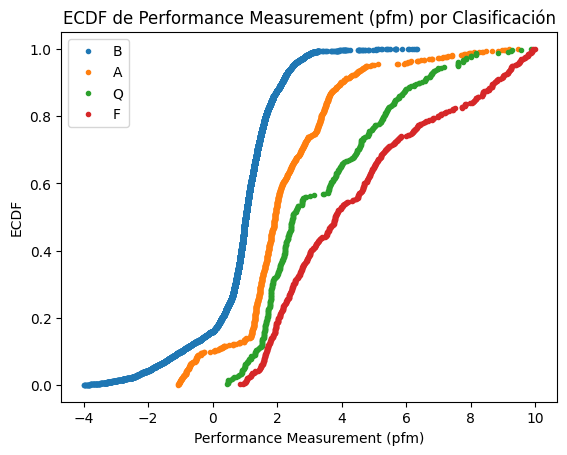

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Calcular la ECDF para un conjunto de datos."""
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Graficar la ECDF para cada clasificación
classifications = ['B', 'A', 'Q', 'F']
for classification in classifications:
    x, y = ecdf(_data[_data['classification'] == classification]['pfm'])
    plt.plot(x, y, marker='.', linestyle='none', label=classification)

plt.legend()
plt.xlabel('Performance Measurement (pfm)')
plt.ylabel('ECDF')
plt.title('ECDF de Performance Measurement (pfm) por Clasificación')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data_model = _data
stats_model = stats

_data['group_number'] = _data['group_number'].replace({'GST': 0, 'UST': 1}).astype(int)
stats['group_number'] = stats['group_number'].replace({'GST': 0, 'UST': 1}).astype(int)

# Convertir valores categóricos en binarios
#_data['group_number'] = _data['group_number'].replace({'GST': 0, 'UST': 1})

# Primero, combinar 'data' con 'stats' para obtener las clasificaciones correctas
# Para simplificar, asumiremos que 'stats' ya tiene las categorías calculadas (esto requeriría el código previo que describimos)
# Aquí solo vamos a fusionar los datos como un ejemplo
combined_data = pd.merge(data_model, stats_model, on=['mfr', 'group_number', 'requested_test_kv'])

# Codificar las variables categóricas con LabelEncoder
label_encoders = {}
for column in ['mfr']:
    label_encoders[column] = LabelEncoder()
    combined_data[column] = label_encoders[column].fit_transform(combined_data[column])

# Separar las características y la etiqueta
X = combined_data[['mfr', 'group_number', 'requested_test_kv']]
y = combined_data['classification']  # Asumiendo que esta columna ya existe en 'combined_data'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que primero escalará los datos y luego aplicará el clasificador
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Si la salida es satisfactoria, el modelo está listo para ser desplegado y utilizado para clasificaciones futuras


              precision    recall  f1-score   support

           A       0.00      0.00      0.00       308
           B       0.81      0.98      0.89      3022
           F       0.49      0.18      0.27       319
           Q       0.00      0.00      0.00       132

    accuracy                           0.80      3781
   macro avg       0.33      0.29      0.29      3781
weighted avg       0.69      0.80      0.73      3781

Accuracy: 0.8011108172441153


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El resultado del modelo muestra que:

Clase A: El modelo no logró identificar correctamente ninguna instancia de esta clase (precisión y recall de 0.00). Esto podría ser un indicador de que el modelo no tiene suficientes datos para aprender a identificar esta clase o que los datos de esta clase no son distintivos suficientemente para diferenciarlos de las otras clases.

Clase B: El modelo tiene un alto rendimiento en esta clase con una precisión de 0.81 y un recall de 0.98. Esto significa que de todas las instancias que el modelo predijo como clase B, el 81% eran correctas, y el modelo capturó el 98% de todas las instancias reales de la clase B.

Clase F: Hay una precisión de 0.49 y un recall de 0.18. Esto indica que solo alrededor de la mitad de las predicciones de la clase F fueron correctas, y solo se identificaron el 18% de los casos reales de la clase F.

Clase Q: Similar a la clase A, el modelo no identificó correctamente ninguna instancia de la clase Q.

Accuracy: La precisión general del modelo es del 80.11%, lo que parece ser alto, pero este número está probablemente inflado debido al alto rendimiento en la clase B, que parece ser la clase mayoritaria.

Macro avg: En promedio, sin tener en cuenta el desequilibrio de clases, el modelo tiene un rendimiento bajo (0.33 en precisión, 0.29 en recall).

Weighted avg: Teniendo en cuenta el desequilibrio de clases, los promedios ponderados de precisión y recall son más altos (0.69 y 0.73 respectivamente) debido al buen rendimiento en la clase mayoritaria B.

Estos resultados indican que el modelo está sesgado hacia la clase mayoritaria (B) y no está clasificando bien las clases minoritarias (A, Q y F). Esto es un problema común en conjuntos de datos desequilibrados.

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import LabelBinarizer

# Preparar LabelBinarizer para convertir las etiquetas categóricas en una forma binaria
lb = LabelBinarizer()

# Ajustar a las etiquetas de entrenamiento y luego transformar las etiquetas de entrenamiento y prueba
lb.fit(y_train)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_pred)

# Calcular el índice de Jaccard para cada clase
jaccard_scores = jaccard_score(y_test_binarized, y_pred_binarized, average=None)

# Calcular el promedio macro y ponderado del índice de Jaccard
jaccard_macro = jaccard_score(y_test_binarized, y_pred_binarized, average='macro')
jaccard_weighted = jaccard_score(y_test_binarized, y_pred_binarized, average='weighted')

print(f"Jaccard por clase: {jaccard_scores}")
print(f"Jaccard promedio macro: {jaccard_macro}")
print(f"Jaccard promedio ponderado: {jaccard_weighted}")

# A continuación, incluimos el índice de Jaccard en la evaluación del modelo junto con las otras métricas
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Jaccard Index - Macro Average:", jaccard_macro)
print("Jaccard Index - Weighted Average:", jaccard_weighted)


Jaccard por clase: [0.         0.79994615 0.1530343  0.        ]
Jaccard promedio macro: 0.238245112623845
Jaccard promedio ponderado: 0.6522759075264378
              precision    recall  f1-score   support

           A       0.00      0.00      0.00       308
           B       0.81      0.98      0.89      3022
           F       0.49      0.18      0.27       319
           Q       0.00      0.00      0.00       132

    accuracy                           0.80      3781
   macro avg       0.33      0.29      0.29      3781
weighted avg       0.69      0.80      0.73      3781

Accuracy: 0.8011108172441153
Jaccard Index - Macro Average: 0.238245112623845
Jaccard Index - Weighted Average: 0.6522759075264378


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Los resultados del índice de Jaccard y las otras métricas de clasificación proporcionan una visión más completa del rendimiento del modelo:

Índice de Jaccard por Clase: Los valores son 0 para las clases A y Q, lo que indica que el modelo no pudo identificar correctamente ninguna instancia de estas clases. Para la clase B, el índice es bastante alto (aproximadamente 0.80), lo que sugiere que el modelo clasifica bien esta clase. La clase F tiene un índice bajo (aproximadamente 0.15), lo que indica un rendimiento pobre en esta clase.

Índice de Jaccard Promedio Macro: El promedio macro del índice de Jaccard es aproximadamente 0.24, lo cual es bastante bajo. Este promedio no toma en cuenta el desbalance entre clases, por lo que refleja el bajo rendimiento en las clases minoritarias.

Índice de Jaccard Promedio Ponderado: El promedio ponderado es aproximadamente 0.65, que es más alto que el promedio macro debido a la influencia de la clase mayoritaria (B).

Precisión y Recall: La precisión y el recall son altos para la clase B, pero bajos o nulos para las clases A y Q, y moderados para la clase F.

Accuracy: A pesar de que la precisión general es del 80%, este número está influenciado en gran medida por la clase B, que es la clase mayoritaria.

Estos resultados refuerzan la conclusión de que el modelo está sesgado hacia la clase mayoritaria y no está clasificando adecuadamente las clases minoritarias.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Aplicar SMOTE para equilibrar las clases
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Entrenar un nuevo modelo con los datos reequilibrados
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Utilizar GridSearchCV para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(model, param_grid, scoring='f1_weighted', cv=5)
grid_search.fit(X_smote, y_smote)

# Evaluar el modelo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcular la puntuación F1 ponderada
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score (Weighted): {f1}")

# Incluir la puntuación de Jaccard como una métrica adicional
jaccard_weighted = jaccard_score(lb.transform(y_test), lb.transform(y_pred), average='weighted')
print(f"Jaccard Score (Weighted): {jaccard_weighted}")


F1 Score (Weighted): 0.3634528789698288
Jaccard Score (Weighted): 0.2245513744135174


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar los conjuntos de datos
try:
    estadisticas_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_integradorA/estadisticas.csv')
    clean_dataSets_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_integradorA/clean_dataSets.csv')
except Exception as e:
    print(f"Ocurrió un error al cargar los archivos CSV: {e}")

# Estandarización de las columnas relevantes de estadisticas.csv
columnas_estadisticas = ['media', 'desviacion_estandar']

# Inicializar StandardScaler para estadisticas.csv
scaler_estadisticas = StandardScaler()
estadisticas_df[columnas_estadisticas] = scaler_estadisticas.fit_transform(estadisticas_df[columnas_estadisticas])

# Inicializar un nuevo StandardScaler para 'pfm' en clean_dataSets.csv
scaler_pfm = StandardScaler()
clean_dataSets_df['pfm'] = scaler_pfm.fit_transform(clean_dataSets_df[['pfm']])

# Verificar la estandarización
print("Media y Desviación Estándar en estadisticas_df después de estandarizar:")
print(estadisticas_df[columnas_estadisticas].mean())
print(estadisticas_df[columnas_estadisticas].std())

print("\nMedia y Desviación Estándar en clean_dataSets_df para 'pfm' después de estandarizar:")
print(clean_dataSets_df['pfm'].mean())
print(clean_dataSets_df['pfm'].std())

# Guardar los conjuntos de datos estandarizados
estadisticas_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_integradorA/estadisticas_estandarizadas.csv', index=False)
clean_dataSets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_integradorA/clean_dataSets_estandarizados.csv', index=False)

Media y Desviación Estándar en estadisticas_df después de estandarizar:
media                 -6.111319e-17
desviacion_estandar    4.150366e-18
dtype: float64
media                  1.004619
desviacion_estandar    1.004706
dtype: float64

Media y Desviación Estándar en clean_dataSets_df para 'pfm' después de estandarizar:
4.234900990537006e-17
1.0000323933852793


Para estadisticas_df:

Las medias (media y desviacion_estandar) están muy cercanas a 0, lo cual es esperado después de una estandarización. Esto significa que la media de cada columna ha sido ajustada para ser 0.
Las desviaciones estándar están alrededor de 1, también como se espera en una estandarización. Esto indica que la dispersión de los datos (la cantidad en que varían respecto a la media) se ha escalado para que la desviación estándar sea 1.

Para clean_dataSets_df (columna pfm):

La media es muy cercana a 0 (aproximadamente
4.23×10
−17
 ), lo que indica que la columna pfm ha sido centrada correctamente.
La desviación estándar es prácticamente 1 (1.0000323933852793), lo que significa que la escala de los datos ha sido normalizada adecuadamente.

In [14]:
# Primero, cargaremos el conjunto de datos estandarizado
clean_dataSets_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_integradorA/clean_dataSets_estandarizados.csv')

# Suponiendo que has identificado las características operativas relevantes, las incluiremos junto con 'pfm'
# columnas requested_test_kv, test_kv, measured_cap, 	pfm, group_number, stator_kv
caracteristicas_seleccionadas = ['pfm', 'requested_test_kv', 'test_kv', 'measured_cap']

# Ahora creamos un nuevo DataFrame con solo las características seleccionadas
data_para_clustering = clean_dataSets_df[caracteristicas_seleccionadas]

# Verificación: Mostrar las primeras filas del DataFrame para clustering
print(data_para_clustering.head())


        pfm  requested_test_kv   test_kv   measured_cap
0 -0.122773                2.0  1.994720  948070.805862
1 -0.011785                4.0  4.015733  950296.254132
2  0.085386                6.0  5.990353  947210.963886
3  0.186858                8.0  8.009873  954618.258220
4 -0.125803                2.0  2.000625  945508.958239


Vamos a proceder con la selección de estas características para el clustering.

In [16]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [19]:
data_para_clustering.dropna(inplace=True)

<ipython-input-19-4a10020b02bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_para_clustering.dropna(inplace=True)


In [20]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Puedes cambiar 'mean' por 'median' si lo prefieres
data_para_clustering_imputed = imputer.fit_transform(data_para_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

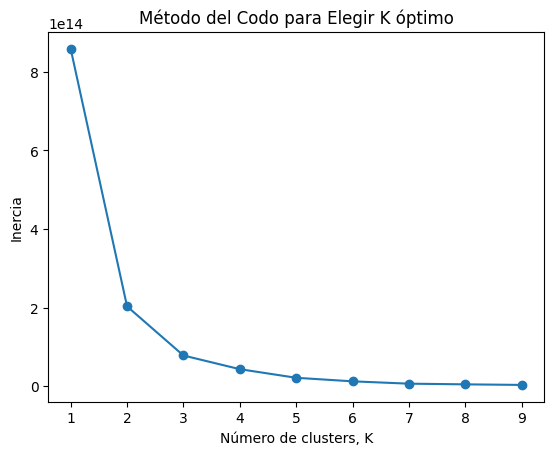

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumiendo que has elegido uno de los métodos anteriores para tratar los NaN
# Por ejemplo, utilizando la imputación (ajusta la variable según tu elección)
data_para_clustering = pd.DataFrame(data_para_clustering_imputed, columns=data_para_clustering.columns)

# Calcular la suma de los cuadrados dentro de los clusters para cada K
inertias = []
k_values = range(1, 10)
for k in k_values:
    model = KMeans(n_clusters=k)
    model.fit(data_para_clustering)
    inertias.append(model.inertia_)

# Graficar la suma de cuadrados dentro de los clusters
plt.plot(k_values, inertias, '-o')
plt.xlabel('Número de clusters, K')
plt.ylabel('Inercia')
plt.title('Método del Codo para Elegir K óptimo')
plt.show()



La gráfica muestra que la inercia disminuye significativamente a medida que aumentamos el número de clusters (K) de 1 a 2 y sigue disminuyendo a un ritmo más lento para valores mayores de K. La elección de K óptimo generalmente se hace donde se observa un cambio en la pendiente de la inercia que ya no es tan pronunciado, lo que a menudo se describe como el "punto de inflexión" o "codo". En tu gráfico, este punto parece estar alrededor de K=3, donde la disminución de la inercia comienza a aplanarse.

puedes proceder a segmentar los datos en 3 clusters usando K-Means.

Esto podría proporcionar información sobre la estructura subyacente de los datos o ayudar a descubrir grupos naturales dentro de tu conjunto de datos.

In [22]:
k_optimo = 3  # Reemplazar con el valor óptimo que determinaste
kmeans_model = KMeans(n_clusters=k_optimo)
cluster_labels = kmeans_model.fit_predict(data_para_clustering)

# Agregar los labels del cluster al DataFrame
data_para_clustering['Cluster'] = cluster_labels

# Explorar los resultados
print(data_para_clustering.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


        pfm  requested_test_kv   test_kv   measured_cap  Cluster
0 -0.122773                2.0  1.994720  948070.805862        0
1 -0.011785                4.0  4.015733  950296.254132        0
2  0.085386                6.0  5.990353  947210.963886        0
3  0.186858                8.0  8.009873  954618.258220        0
4 -0.125803                2.0  2.000625  945508.958239        0


visualización en 3D de los clusters utilizando PCA

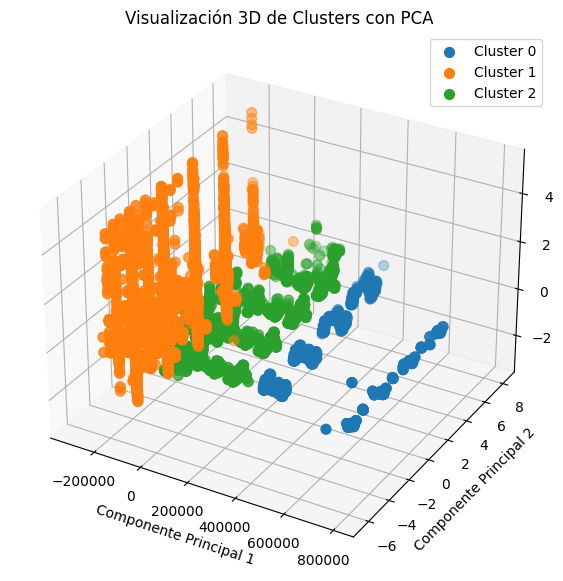

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Asegúrate de tener tu DataFrame 'data_para_clustering' listo y con la columna 'Cluster' de KMeans

# Inicializar PCA para reducir a tres dimensiones
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(data_para_clustering.drop('Cluster', axis=1))

# Agregar la asignación de clusters al conjunto de datos reducido
data_reduced_with_clusters = pd.DataFrame(data_reduced, columns=['PC1', 'PC2', 'PC3'])
data_reduced_with_clusters['Cluster'] = data_para_clustering['Cluster']

# Crear una figura para una gráfica en 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Asignar un color diferente a cada cluster
colors = ['r', 'g', 'b']
for cluster_number in data_reduced_with_clusters['Cluster'].unique():
    cluster_data = data_reduced_with_clusters[data_reduced_with_clusters['Cluster'] == cluster_number]
    ax.scatter(cluster_data['PC1'], cluster_data['PC2'], cluster_data['PC3'], label=f'Cluster {cluster_number}', s=50)

ax.set_title('Visualización 3D de Clusters con PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()
plt.show()


La visualización 3D muestra los datos proyectados en los tres primeros componentes principales después de aplicar Análisis de Componentes Principales (PCA).

 Cada punto en el gráfico representa una observación (en este caso, una fila de tu conjunto de datos) y el color de cada punto indica el cluster al que pertenece esa observación después de aplicar el algoritmo de clustering K-Means.

 **Ejes del Gráfico:** Los ejes X, Y y Z representan el primer, segundo y tercer componente principal respectivamente. Estas son las direcciones en el espacio de características donde los datos tienen la mayor varianza, y PCA las utiliza para reducir la dimensionalidad con el mínimo de pérdida de información.

**Clusters:** Los colores (azul, naranja y verde) representan diferentes clusters encontrados por K-Means. Observaciones dentro del mismo cluster tienden a ser similares entre sí según las características utilizadas para el clustering.

**Separación de Clusters:** La separación espacial entre grupos de puntos de colores diferentes indica qué tan bien los clusters están definidos. Si los clusters están bien separados, sugiere que el modelo de clustering está haciendo un buen trabajo al agrupar observaciones similares.

**Distribución de Clusters:** La dispersión y la densidad de los puntos pueden darte una idea sobre la distribución de los datos dentro de cada cluster. Por ejemplo, un cluster puede tener una dispersión más amplia, indicando una mayor variabilidad dentro de ese grupo.

In [24]:
from sklearn.mixture import GaussianMixture


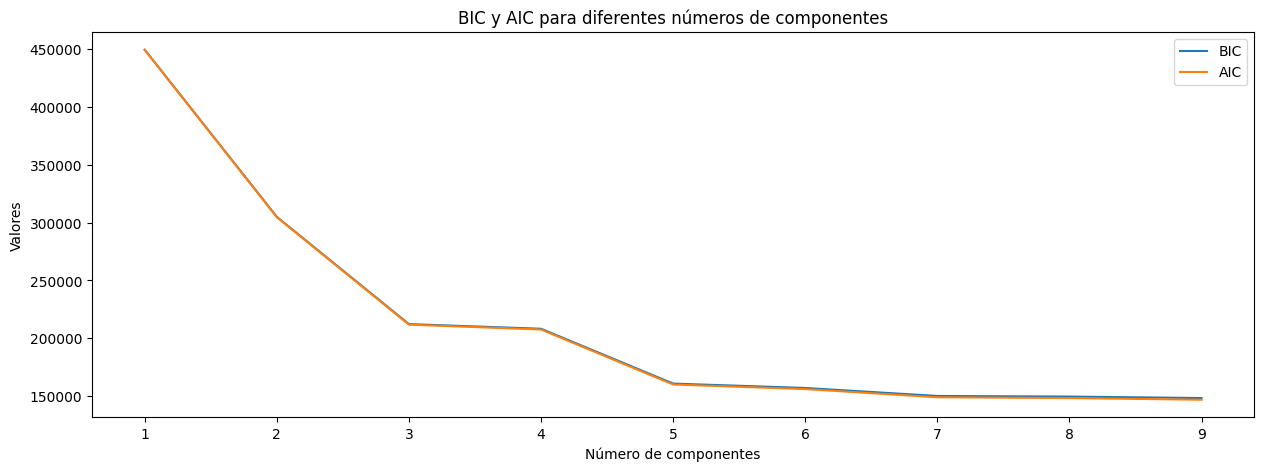

Número óptimo de componentes según BIC: 9


In [25]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Preparar los datos (asegúrate de que no haya NaNs)
X = data_para_clustering.dropna()

# Evaluar modelos con diferentes números de componentes
bic_values = []
aic_values = []
n_components_range = range(1, 10)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(X)
    bic_values.append(gmm.bic(X))
    aic_values.append(gmm.aic(X))

# Graficar BIC y AIC
plt.figure(figsize=(15, 5))
plt.plot(n_components_range, bic_values, label='BIC')
plt.plot(n_components_range, aic_values, label='AIC')
plt.xlabel('Número de componentes')
plt.ylabel('Valores')
plt.legend()
plt.title('BIC y AIC para diferentes números de componentes')
plt.show()

# Elegir el número óptimo de componentes (el menor BIC)
optimal_n_components = np.argmin(bic_values) + 1
print(f'Número óptimo de componentes según BIC: {optimal_n_components}')

# Ajustar GMM con el número óptimo de componentes
gmm = GaussianMixture(n_components=optimal_n_components, random_state=0)
gmm.fit(X)
clusters = gmm.predict(X)

# Añadir los clusters al DataFrame original para análisis
data_para_clustering['GMM_Cluster'] = clusters


**Tendencia:** Ambos, el BIC y el AIC, disminuyen a medida que el número de componentes aumenta. Esto es típico ya que agregar más componentes generalmente mejora el ajuste del modelo a los datos.

**Selección de Componentes:** Buscas el punto donde el BIC y el AIC ya no disminuyen sustancialmente con componentes adicionales, lo cual indica un equilibrio entre la complejidad del modelo y el ajuste a los datos. En tu gráfico, este punto parece ser alrededor de 2 o 3, ya que después de eso, la disminución en los valores de BIC y AIC es menos pronunciada.

**Número Óptimo de Componentes:** basados en este gráfico, se puede elegir 2 o 3 como el número óptimo de componentes para el modelo GMM.

In [28]:
from sklearn.mixture import GaussianMixture

# Suponiendo que X es el DataFrame que contiene tus datos ya limpios y listos para el modelo
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)

# Obtener las probabilidades de pertenencia de cada punto a cada cluster
probabilidades = gmm.predict_proba(X)

# Crear un DataFrame con las probabilidades para una mejor visualización
probabilidades_df = pd.DataFrame(probabilidades, columns=['Cluster_0', 'Cluster_1', 'Cluster_2','Cluster_3'])

# Ver las primeras filas del DataFrame con probabilidades
print(probabilidades_df.head())


      Cluster_0  Cluster_1  Cluster_2  Cluster_3
0  1.388120e-30        0.0        0.0        1.0
1  6.722774e-32        0.0        0.0        1.0
2  5.706093e-32        0.0        0.0        1.0
3  5.268223e-34        0.0        0.0        1.0
4  6.174531e-30        0.0        0.0        1.0


In [29]:
# Supongamos que data_para_clustering incluye tus datos originales con una columna adicional 'GMM_Cluster' de GMM
# Calcula estadísticas descriptivas para cada cluster
for cluster in np.sort(data_para_clustering['GMM_Cluster'].unique()):
    cluster_data = data_para_clustering[data_para_clustering['GMM_Cluster'] == cluster]
    print(f"Estadísticas descriptivas para el Cluster {cluster}:")
    print(cluster_data.describe())
    print("\n")


Estadísticas descriptivas para el Cluster 0:
              pfm  requested_test_kv     test_kv   measured_cap  Cluster  \
count  897.000000         897.000000  897.000000     897.000000    897.0   
mean     0.372171           5.023411    5.024463  477502.656000      2.0   
std      0.325951           2.250126    2.250656   12706.474006      0.0   
min     -0.285470           2.000000    1.982000  435623.491057      2.0   
25%      0.125108           4.000000    3.986000  470444.700000      2.0   
50%      0.319521           6.000000    5.994000  479532.502595      2.0   
75%      0.588267           8.000000    7.990000  485918.519644      2.0   
max      1.450305           8.000000    8.039000  507314.300000      2.0   

       GMM_Cluster  
count        897.0  
mean           0.0  
std            0.0  
min            0.0  
25%            0.0  
50%            0.0  
75%            0.0  
max            0.0  


Estadísticas descriptivas para el Cluster 1:
               pfm  requested_test

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -3       0.00      0.00      0.00         5
          -2       0.00      0.00      0.00       416
          -1       0.00      0.00      0.00      1273
           0       0.93      0.08      0.16     12377
           1       0.06      0.68      0.11       760
           2       0.01      0.19      0.02       289
           3       0.00      0.00      0.00       160
           4       0.00      0.00      0.00       154

    accuracy                           0.11     15434
   macro avg       0.13      0.12      0.04     15434
weighted avg       0.75      0.11      0.13     15434



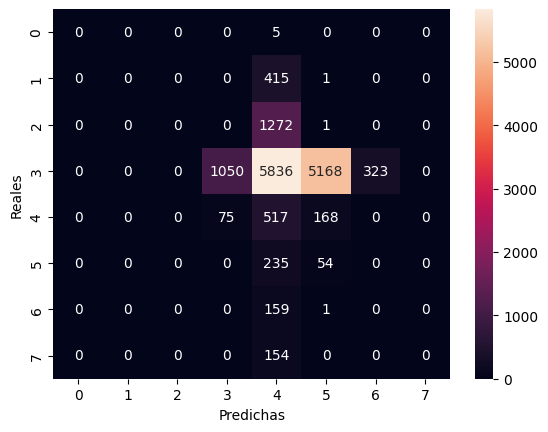

In [35]:
# Asumiendo que tienes las probabilidades predichas por GMM y necesitas convertirlas en etiquetas discretas
# Convertir las probabilidades de GMM en etiquetas discretas
predicted_labels = np.argmax(probabilidades, axis=1)  # Asumiendo que 'probabilidades' es el output de gmm.predict_proba()

# Convertir las etiquetas reales a enteros si es necesario
true_labels = data_para_clustering['pfm'].astype(int)

# Calcular la matriz de confusión y las métricas de clasificación
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print(classification_report(true_labels, predicted_labels))

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predichas')
plt.ylabel('Reales')
plt.show()


Matriz de Confusión:

-Los valores a lo largo de la diagonal principal de la matriz de confusión (donde las etiquetas predichas coinciden con las etiquetas reales) indican las cantidades de verdaderos positivos para cada categoría.

-Hay una gran cantidad de verdaderos positivos para la categoría con etiqueta 0, pero también hay una cantidad significativa de falsos negativos, donde las observaciones de la categoría 0 están siendo clasificadas incorrectamente en la categoría 3.

-Las categorías -3, -2, -1, y 4 no tienen verdaderos positivos, lo que sugiere que el modelo no está identificando correctamente estas categorías.

**Informe de Clasificación:**

-Las métricas de precisión, recall y f1-score para la mayoría de las categorías son extremadamente bajas, lo que indica que el modelo no está clasificando bien las observaciones.

-La categoría 0 tiene una precisión muy alta, lo que significa que cuando el modelo predice la categoría 0, es probable que sea correcta. Sin embargo, el recall es muy bajo, lo que indica que muchas observaciones de la categoría 0 se están perdiendo (no se están clasificando como 0).

-La categoría 1 tiene un recall relativamente alto, lo que significa que la mayoría de las observaciones de la categoría 1 se están clasificando como 1, pero la precisión es baja, lo que indica que muchas observaciones que no son de la categoría 1 también se están clasificando como 1.

-Las etiquetas -3, -2, -1, y 4 tienen precisión y recall de 0.00, lo que significa que el modelo no ha clasificado correctamente ninguna observación en estas categorías.

In [4]:
import pandas as pd
import numpy as np

# Asegúrate de que los nombres de las columnas en 'estadisticas_df' coincidan con estos
media = estadisticas_df['media'].iloc[0]
desviacion_estandar = estadisticas_df['desviacion_estandar'].iloc[0]

# Definir la función de clasificación
def clasificar_pfm(row):
    if row['pfm'] <= media - desviacion_estandar:
        return 'B'
    elif row['pfm'] > media - desviacion_estandar and row['pfm'] <= media - 2 * desviacion_estandar:
        return 'A'
    elif row['pfm'] > media - 2 * desviacion_estandar and row['pfm'] <= media - 3 * desviacion_estandar:
        return 'Q'
    else:  # Aquí se asume que cualquier valor mayor a 'media - 3 * desviacion_estandar' es categoría 'F'
        return 'F'

# Aplicar la función de clasificación
clean_dataSets_df['Etiqueta'] = clean_dataSets_df.apply(clasificar_pfm, axis=1)

# Mostrar los resultados
print(clean_dataSets_df[['pfm', 'Etiqueta']].head())



        pfm Etiqueta
0 -0.122773        B
1 -0.011785        B
2  0.085386        B
3  0.186858        B
4 -0.125803        B


In [13]:
clean_dataSets_df.head()

,Unnamed: 0,fecha,serial,mfr,requested_test_kv,test_kv,ma,watts,measured_cap,pfm,group_number,stator_kv,Etiqueta
0,0,2018-11-27 16:07:37,715015,TOS,2.0,1.994720,3572.892785,388.191193,948070.805862,-0.122773,GST,13.8,B
1,1,2018-11-27 16:07:37,715015,TOS,4.0,4.015733,3583.967686,458.960388,950296.254132,-0.011785,GST,13.8,B
2,2,2018-11-27 16:07:37,715015,TOS,6.0,5.990353,3568.703294,517.651520,947210.963886,0.085386,GST,13.8,B
3,3,2018-11-27 16:07:37,715015,TOS,8.0,8.009873,3599.445462,585.986572,954618.258220,0.186858,GST,13.8,B
4,4,2018-11-27 16:07:37,715015,TOS,2.0,2.000625,3562.023163,385.123230,945508.958239,-0.125803,GST,13.8,B


In [16]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Asegúrate de que 'columna_etiquetas_reales' y 'columna_etiquetas_clustering' sean los nombres correctos
columna_etiquetas_reales = 'Etiqueta'
columna_etiquetas_clustering = 'group_number'

# Calcular el puntaje de Silueta
X = clean_dataSets_df['pfm'].values.reshape(-1, 1)
silhouette_avg = silhouette_score(X, clean_dataSets_df[columna_etiquetas_clustering])
print(f"Puntuación de Silueta: {silhouette_avg}")

# Calcular ARI y NMI
ari = adjusted_rand_score(clean_dataSets_df[columna_etiquetas_reales], clean_dataSets_df[columna_etiquetas_clustering])
nmi = normalized_mutual_info_score(clean_dataSets_df[columna_etiquetas_reales], clean_dataSets_df[columna_etiquetas_clustering])
print(f"Índice Rand Ajustado (ARI): {ari}")
print(f"Información Mutua Normalizada (NMI): {nmi}")


Puntuación de Silueta: 0.14765434283745837
Índice Rand Ajustado (ARI): 0.00481294117138637
Información Mutua Normalizada (NMI): 0.024224118117884035


**Puntaje de Silueta (0.1477):**

Este puntaje varía entre -1 y 1. Un valor cercano a 1 indica que los clusters están bien separados y claramente definidos.

Un valor cercano a 0 indica clusters superpuestos, y un valor negativo sugiere asignaciones inapropiadas de datos en los clusters.

El puntaje de 0.1477 sugiere que los clusters están relativamente definidos, pero hay un margen considerable para la mejora. Los clusters no están claramente distinguidos y pueden tener cierta superposición.


**Índice Rand Ajustado (ARI) (0.0048):**

El ARI compara las etiquetas de clustering con las etiquetas reales y ajusta por azar. Varía de -1 a 1, donde 1 significa una correspondencia perfecta entre las etiquetas de clustering y las reales.

Un ARI de 0.0048 es muy bajo, lo que indica que hay muy poca correspondencia entre las etiquetas de clustering y las etiquetas reales.
Esto sugiere que el modelo de clustering no está capturando efectivamente la estructura real subyacente de tus datos, según las etiquetas reales.

**Información Mutua Normalizada (NMI) (0.0242):**

La NMI mide la cantidad de información compartida por las asignaciones de clustering y las etiquetas reales. Varía de 0 a 1, donde 1 significa una correspondencia perfecta.
Un NMI de 0.0242 es bajo, lo que implica que las etiquetas de clustering tienen muy poco en común con las etiquetas reales.